In [4]:
pip install ydata-profiling

In [5]:
import pandas as pd
from ydata_profiling import ProfileReport

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

In [7]:
account = pd.read_csv("/content/drive/MyDrive/account_activity.csv")
customer = pd.read_csv("/content/drive/MyDrive/customer_data.csv")
fraud = pd.read_csv("/content/drive/MyDrive/fraud_indicators.csv")
suspision = pd.read_csv("/content/drive/MyDrive/suspicious_activity.csv")
merchant = pd.read_csv("/content/drive/MyDrive/merchant_data.csv")
tran_cat = pd.read_csv("/content/drive/MyDrive/transaction_category_labels.csv")
amount = pd.read_csv("/content/drive/MyDrive/amount_data.csv")
anamoly = pd.read_csv("/content/drive/MyDrive/anomaly_scores.csv")
tran_data = pd.read_csv("/content/drive/MyDrive/transaction_metadata.csv")
tran_rec = pd.read_csv("/content/drive/MyDrive/transaction_records.csv")

In [8]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [9]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [10]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [11]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")

In [12]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,01-01-2022 00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,895,0,Food,90.422026,0.040817,07-02-2022 06:00,2149,53.683898,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
2,2,0,Online,12.053087,0.081749,01-01-2022 01:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
3,3,0,Travel,33.310357,0.023857,01-01-2022 02:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
4,544,0,Retail,20.295348,0.476812,23-01-2022 15:00,2643,52.991184,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,986,0,Other,89.972362,0.285603,11-02-2022 01:00,2036,29.328815,1706,Customer 1706,45,Address 1706,1678.514968,2023-12-07,0
995,989,0,Food,17.848481,0.029543,11-02-2022 04:00,2284,20.443811,1312,Customer 1312,26,Address 1312,6018.443647,2022-11-08,0
996,996,0,Food,89.457059,0.266778,11-02-2022 11:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
997,997,0,Retail,47.958030,0.512483,11-02-2022 12:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      999 non-null    int64  
 1   FraudIndicator     999 non-null    int64  
 2   Category           999 non-null    object 
 3   TransactionAmount  999 non-null    float64
 4   AnomalyScore       999 non-null    float64
 5   Timestamp          999 non-null    object 
 6   MerchantID         999 non-null    int64  
 7   Amount             999 non-null    float64
 8   CustomerID         999 non-null    int64  
 9   Name               999 non-null    object 
 10  Age                999 non-null    int64  
 11  Address            999 non-null    object 
 12  AccountBalance     999 non-null    float64
 13  LastLogin          999 non-null    object 
 14  SuspiciousFlag     999 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 124.9+ KB


In [14]:
data.shape

(999, 15)

In [15]:
data.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.762763,0.045045,55.884419,0.492685,2504.974975,55.395063,1497.099099,39.847848,5719.379982,0.025025
std,288.844486,0.207507,26.088726,0.288286,288.429120,25.083366,288.986532,13.081480,2538.755898,0.156279
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,251.500000,0.000000,33.881084,0.252250,2255.500000,34.483770,1239.000000,29.000000,3494.582891,0.000000
50%,501.000000,0.000000,55.999203,0.491500,2501.000000,57.868203,1501.000000,39.000000,5760.887631,0.000000
75%,750.500000,0.000000,77.591591,0.742594,2761.500000,75.867802,1739.500000,51.000000,7926.338202,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


In [16]:
data.columns

Index(['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount',
       'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID',
       'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag'],
      dtype='object')

In [17]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Category', 'Timestamp', 'Name', 'Address', 'LastLogin']


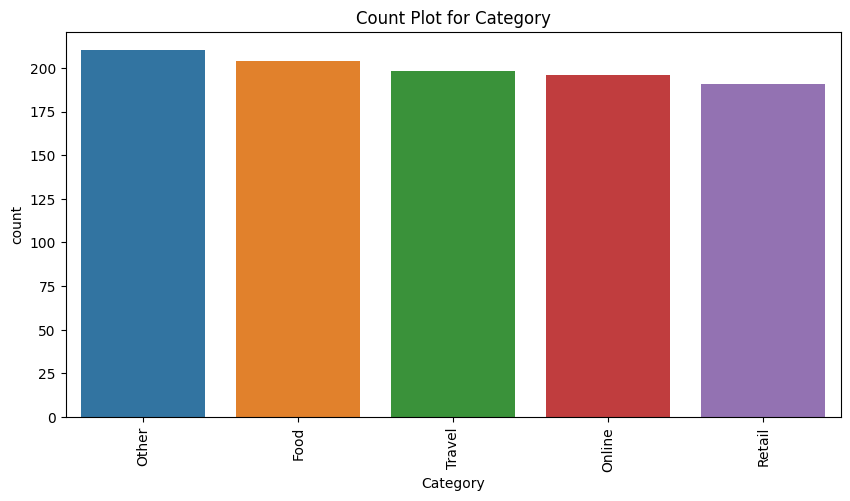

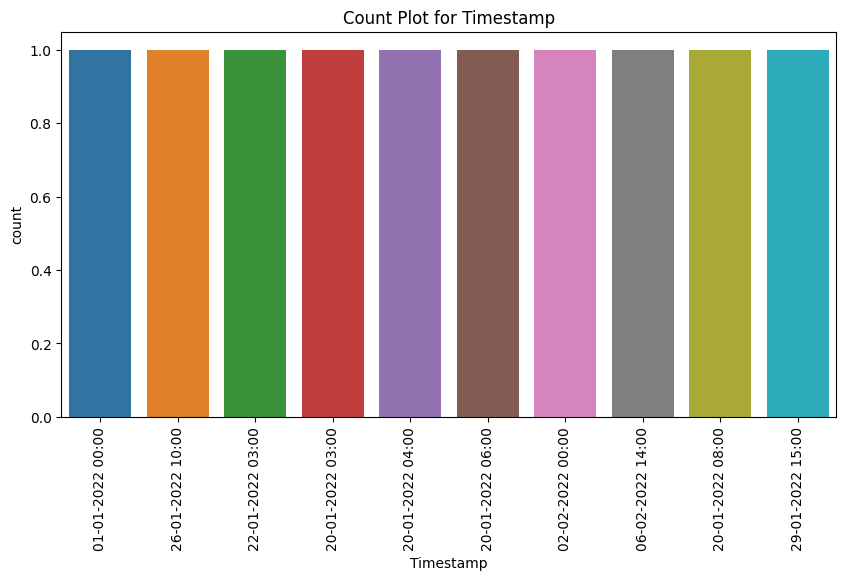

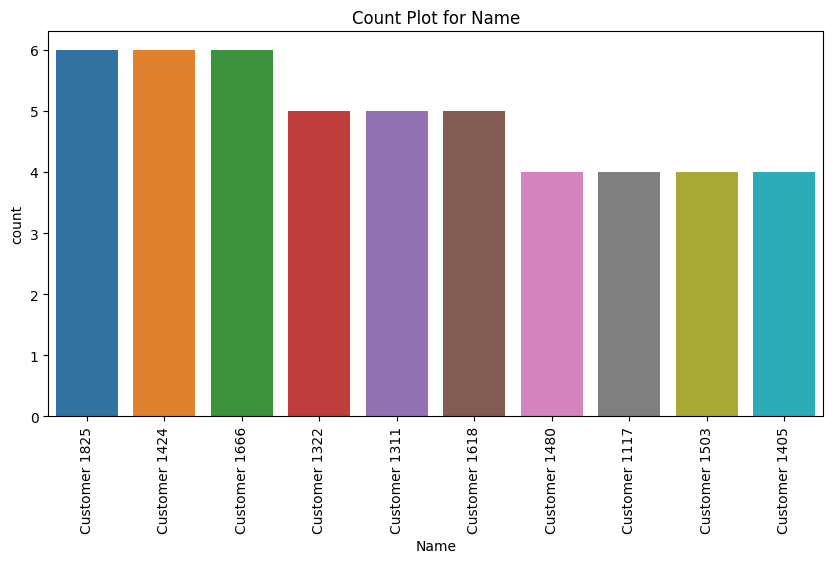

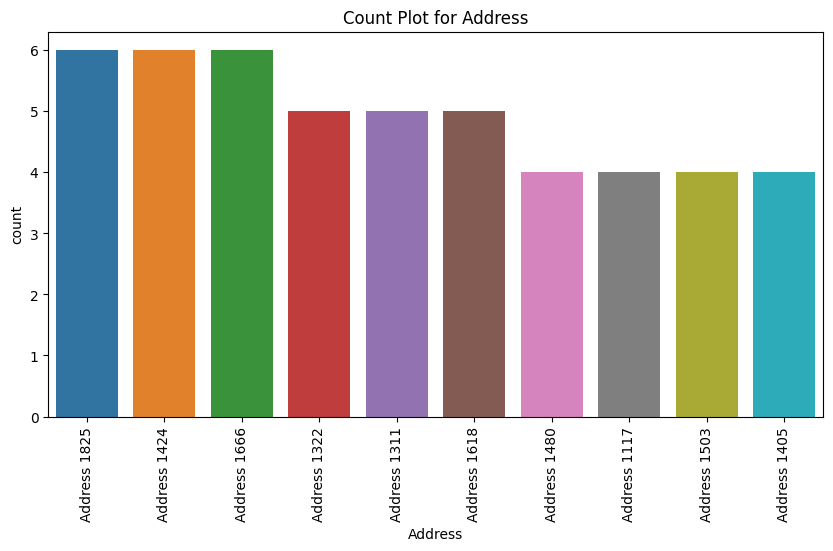

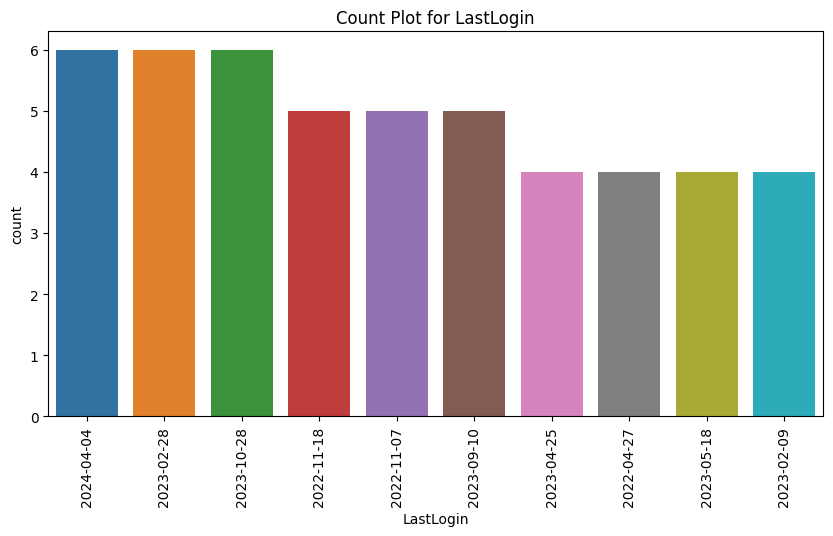

In [18]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()

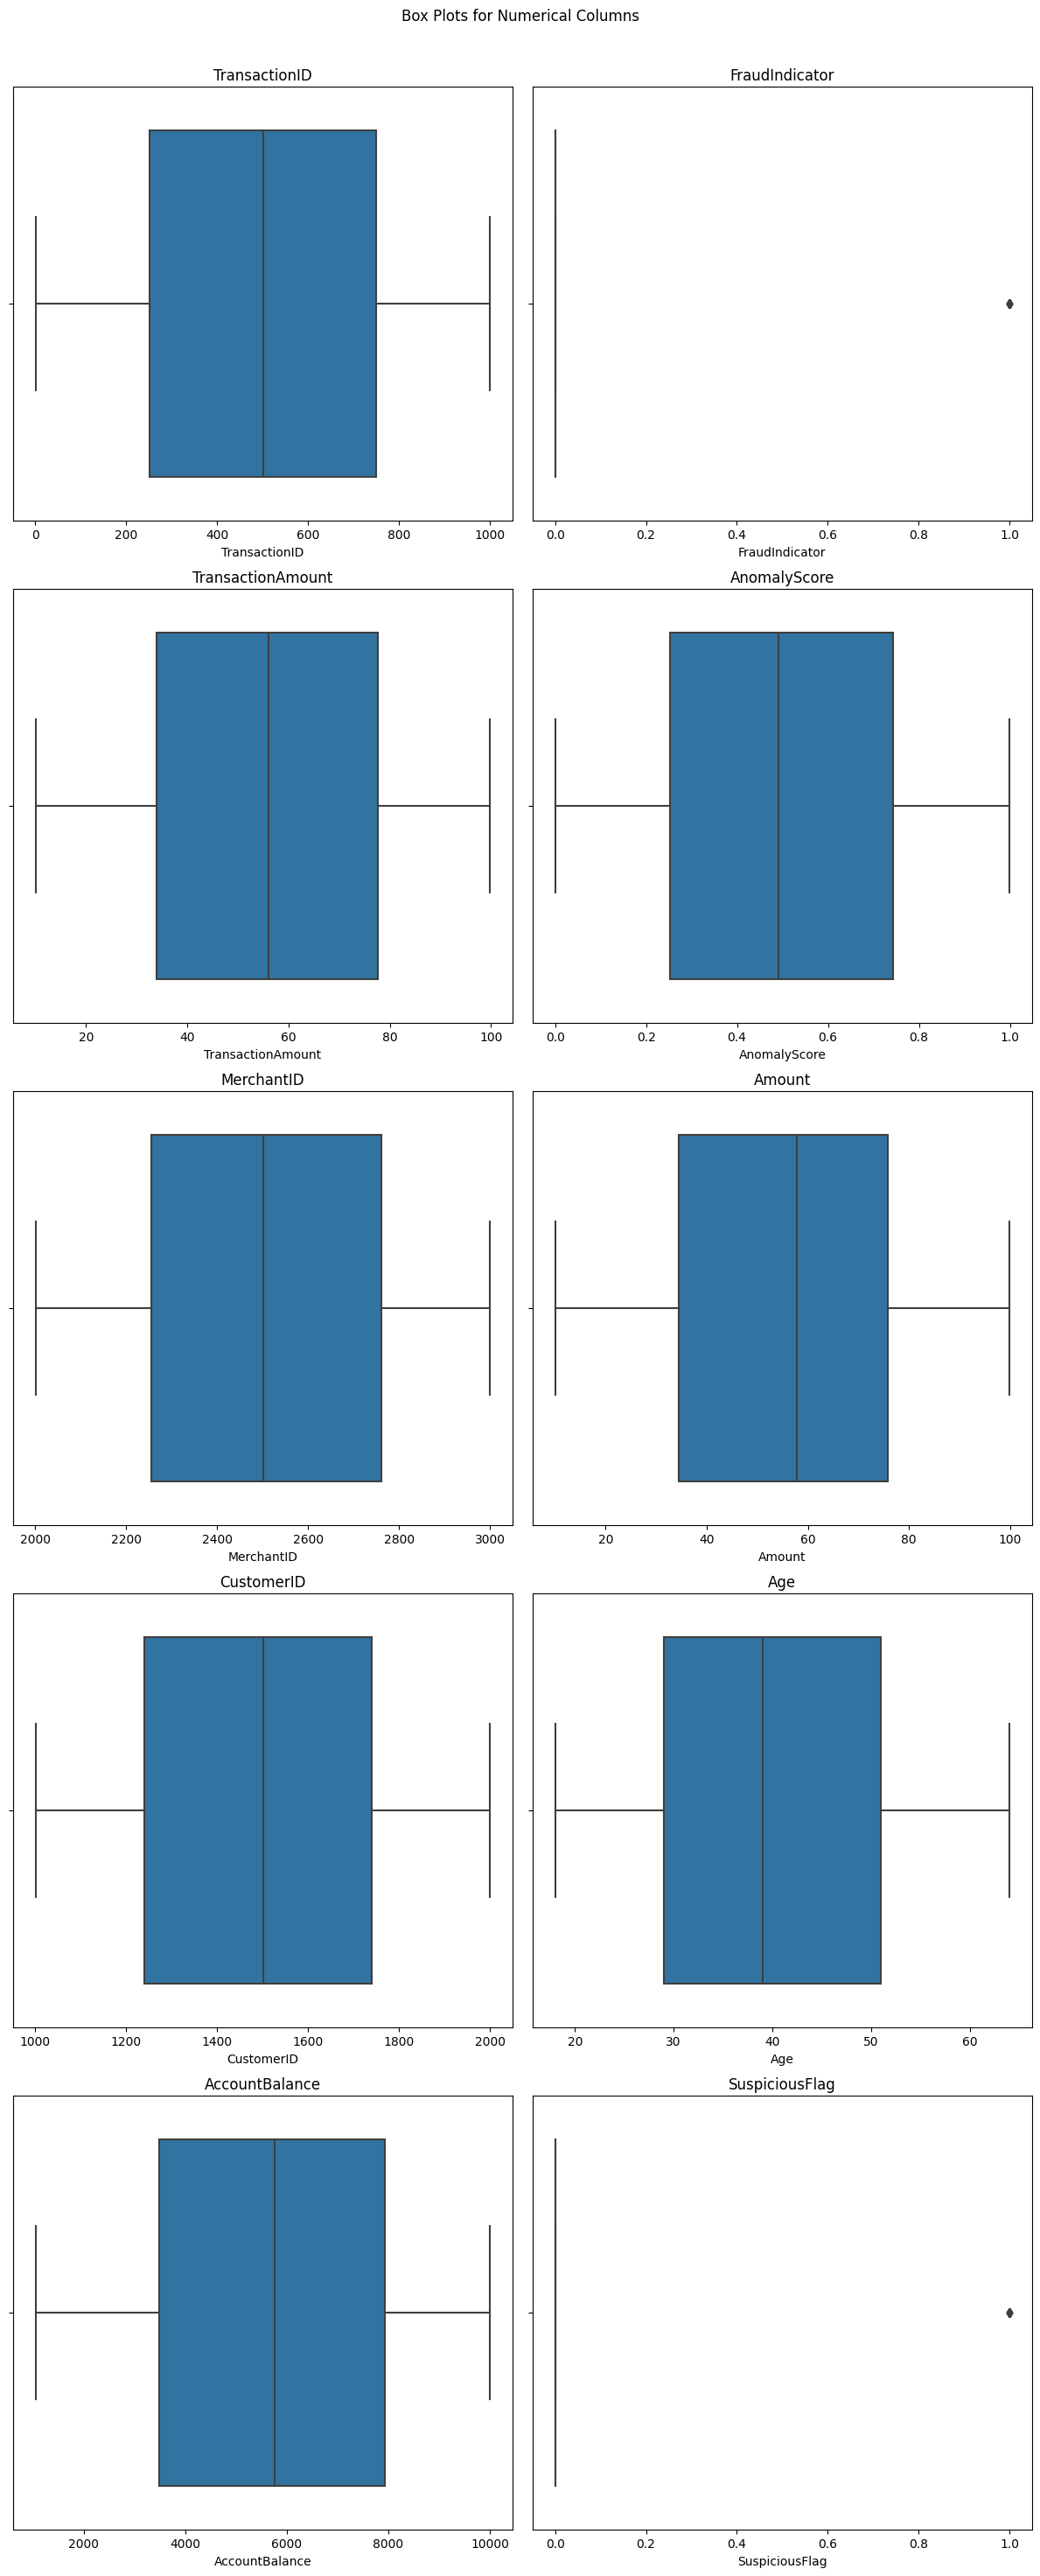

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()

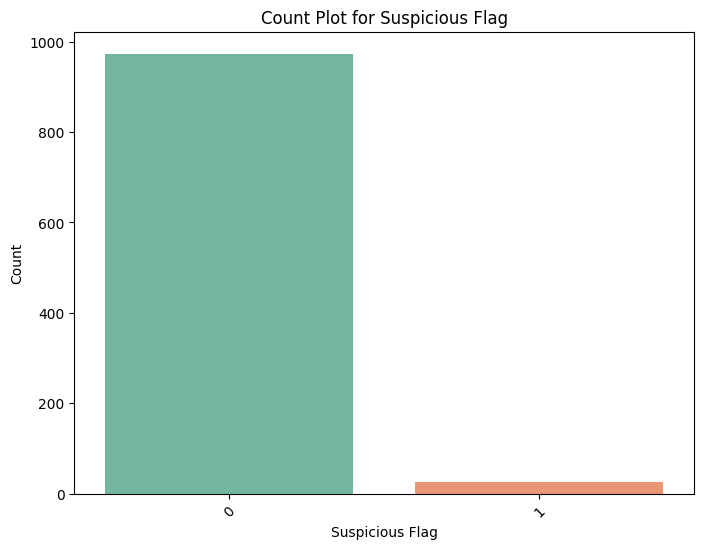

In [20]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

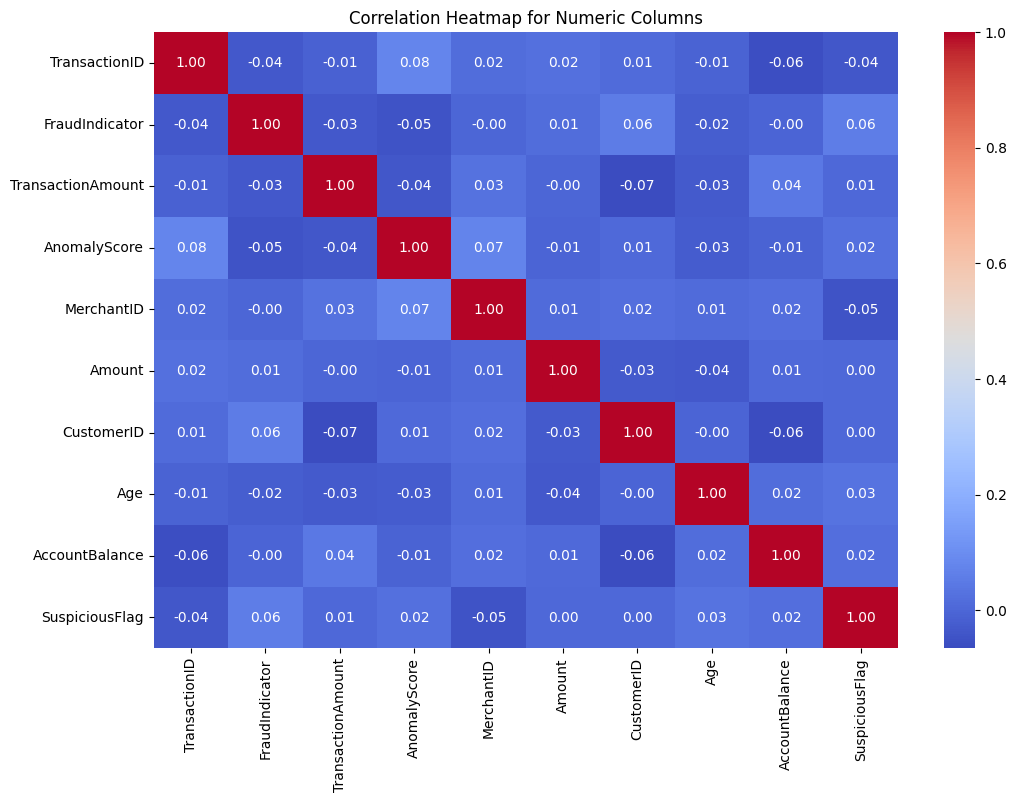

In [21]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()

In [22]:
# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model

columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [23]:
data1 = data.drop(columns_to_be_dropped, axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,01-01-2022 00:00,55.530334,2869.689912,2024-08-09,0
1,0,Food,90.422026,0.040817,07-02-2022 06:00,53.683898,2869.689912,2024-08-09,0
2,0,Online,12.053087,0.081749,01-01-2022 01:00,12.881180,9527.947107,2022-01-27,0
3,0,Travel,33.310357,0.023857,01-01-2022 02:00,50.176322,9288.355525,2024-08-12,0
4,0,Retail,20.295348,0.476812,23-01-2022 15:00,52.991184,9288.355525,2024-08-12,0


In [24]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(0    954
 1     45
 Name: FraudIndicator, dtype: int64,
 0    974
 1     25
 Name: SuspiciousFlag, dtype: int64,
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    191
 Name: Category, dtype: int64)

In [25]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is not in datetime format.


In [26]:
data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])

print(data1.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [27]:
data1['Hour'] = data1['Timestamp1'].dt.hour

In [28]:
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])

In [29]:
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin']).dt.days.abs()

In [30]:
data1.head()


,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,01-01-2022 00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Food,90.422026,0.040817,07-02-2022 06:00,53.683898,2869.689912,2024-08-09,0,2022-07-02 06:00:00,6,769
2,0,Online,12.053087,0.081749,01-01-2022 01:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
3,0,Travel,33.310357,0.023857,01-01-2022 02:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
4,0,Retail,20.295348,0.476812,23-01-2022 15:00,52.991184,9288.355525,2024-08-12,0,2022-01-23 15:00:00,15,932


In [31]:
X = data1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [32]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,0,951
1,0,90.422026,0.040817,53.683898,2869.689912,0,6,769
2,1,12.053087,0.081749,12.881180,9527.947107,0,1,26
3,4,33.310357,0.023857,50.176322,9288.355525,0,2,954
4,3,20.295348,0.476812,52.991184,9288.355525,0,15,932
...,...,...,...,...,...,...,...,...
994,2,89.972362,0.285603,29.328815,1678.514968,0,1,400
995,0,17.848481,0.029543,20.443811,6018.443647,0,4,6
996,0,89.457059,0.266778,19.876750,1290.323059,0,11,105
997,3,47.958030,0.512483,96.299792,7067.831609,0,12,260


In [33]:
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,01-01-2022 00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,895,0,Food,90.422026,0.040817,07-02-2022 06:00,2149,53.683898,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
2,2,0,Online,12.053087,0.081749,01-01-2022 01:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
3,3,0,Travel,33.310357,0.023857,01-01-2022 02:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
4,544,0,Retail,20.295348,0.476812,23-01-2022 15:00,2643,52.991184,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,986,0,Other,89.972362,0.285603,11-02-2022 01:00,2036,29.328815,1706,Customer 1706,45,Address 1706,1678.514968,2023-12-07,0
995,989,0,Food,17.848481,0.029543,11-02-2022 04:00,2284,20.443811,1312,Customer 1312,26,Address 1312,6018.443647,2022-11-08,0
996,996,0,Food,89.457059,0.266778,11-02-2022 11:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
997,997,0,Retail,47.958030,0.512483,11-02-2022 12:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0


In [34]:
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]